# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png" width=800>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [84]:
# Importando o pandas
import pandas as pd

In [85]:
# Importando o dataset de treino
base = pd.read_csv('train.csv')

In [86]:
# Visualizando essa base
base.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [87]:
# Retornando o shape da base
base.shape

(1460, 81)

In [88]:
# E as informações
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Começando a explorar os dados

In [89]:
# Visualizando quantidade de valores vazios
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(10)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageQual,0.055479
GarageFinish,0.055479
GarageType,0.055479


In [90]:
# Podemos eliminar as colunas com mais de 10% de valores vazios
eliminar = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [91]:
# Eliminando essas colunas
base = base.drop(eliminar,axis=1)

In [92]:
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(10)

,0
GarageYrBlt,0.055479
GarageQual,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479
BsmtFinType2,0.026027
BsmtExposure,0.026027
BsmtQual,0.025342
BsmtCond,0.025342
BsmtFinType1,0.025342


- Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    - Vamos **eliminar as colunas de texto**
    - Precisamos **tratar os valores vazios**
    - Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro**

In [23]:
# Selecionando apenas as colunas numéricas
colunas = base.columns[base.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [93]:
# E criar uma nova base com esses valores
base2 = base.loc[:, colunas]
base2.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [95]:
# Verificando os valores vazios
base2.isnull().sum().sort_values(ascending=False).head(3)

,0
Id,0
MSSubClass,0
LotArea,0


In [94]:
# Substituindo os valores vazios por -1
base2 = base2.fillna(-1)

- Essa será nossa base inicial para começar

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [96]:
# Selecionando X e y
X = base2.drop('SalePrice',axis=1)
y = base2.SalePrice

In [97]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [98]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [99]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [100]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [101]:
# Fazendo a previsão pros dados de teste
y_rl = reg_rl.predict(X_test)

In [102]:
# Importando a árvore de regressão
from sklearn import tree

In [103]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [104]:
# Fazendo a previsão
y_ar = reg_ar.predict(X_test)

In [105]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [106]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [107]:
# Fazendo a previsão
y_knn = reg_knn.predict(X_test)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [108]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [109]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [110]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

23763.187393064567
1533982883.444864


In [111]:
# da árvore de decisão
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))

27580.78838174274
2530245114.701245


In [112]:
# e do knn
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

33273.08298755187
2733937586.841286


- **Podemos plotar visualmente a relação do y_test com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [113]:
# Importando o matplotlib
import matplotlib.pyplot as plt

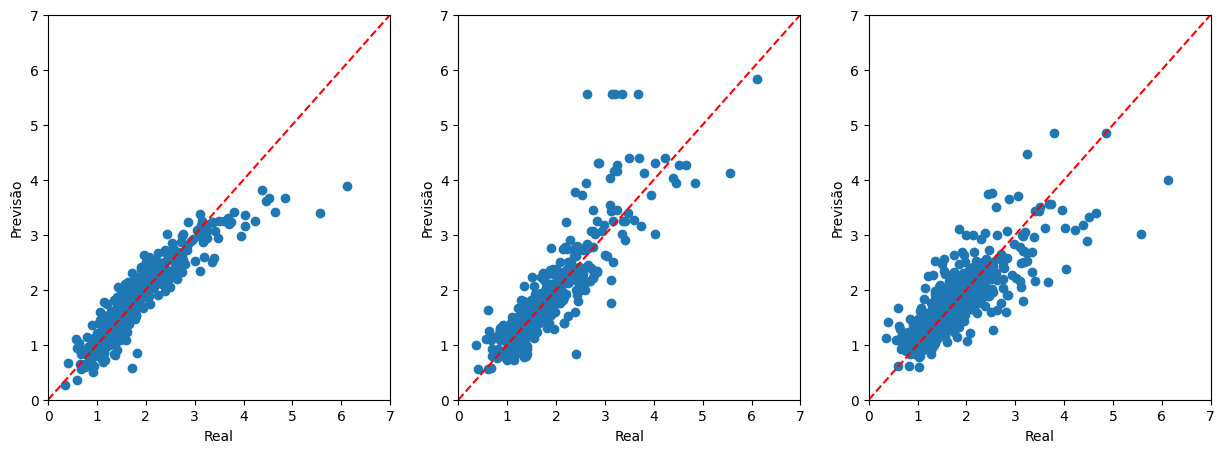

In [114]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000,y_rl/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

- **Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos**

## Fazendo a previsão para a base de teste da competição

In [115]:
# Importando a base de teste
teste = pd.read_csv('test.csv')

In [116]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


- **Agora vamos repetir os mesmos tratamentos que fizemos na base de treino**
    - Obs: **não podemos excluir linhas**

In [117]:
# Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar,axis=1)

In [118]:
# Verificando as colunas numéricas
colunas2 = teste.columns[teste.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [119]:
# Mantendo também apenas as colunas numéricas
teste = teste.loc[:, colunas2]

In [120]:
# Verificando a base restante
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [121]:
# Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False)

,0
GarageYrBlt,78
MasVnrArea,15
BsmtHalfBath,2
BsmtFullBath,2
GarageCars,1
GarageArea,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFinSF1,1


- **Vamos precisar retirar os valores vazios pois a regressão linear não vai conseguir trabalhar com valores vazio**
    - Se tentarmos usar essa base, ele vai retornar um **erro** dizendo que o **input possui valores NaN**
- Podemos apenas substituir por -1 como fizemos acima

In [122]:
# Substituindo os valores vazios por -1
teste = teste.fillna(-1)

- **Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle**

In [123]:
# Vamos usar o knn para fazer a previsão
reg_rl.predict(teste)

array([122234.99595955, 139178.26368417, 169872.05425124, ...,
       175307.58803209, 106132.5314242 , 251494.07738729])

In [124]:
# vamos usar a regressão linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [125]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [126]:
# E extrair somente o Id e o SalePrice
resultado = teste[['Id','SalePrice']]

In [127]:
# Podemos então exportar essa base
resultado.to_csv('resultado.csv',index=False)

- **Próximos passos**
    - Você pode tentar melhorar a limpeza dos seus dados
        - [Limpeza de Dados em um Dataset Real - Dados do Titanic](https://www.youtube.com/watch?v=RuDxj894BXQ&t=1218s)
    - Depois é possível fazer a engenharia de recursos
        - [Feature Engineering em Python para Seus Projetos de Ciência de Dados](https://www.youtube.com/watch?v=rigZ7HdfWaM&t=61s)
    - A padronização / normalização dos dados
        - [Padronização e Normalização de Dados para Ciência de Dados](https://www.youtube.com/watch?v=L6rLSYVBfyM&t=12s)
    - E até a seleção de variáveis
        - [Seleção de Recursos (Feature Selection) em Projetos de Ciência de Dados](https://www.youtube.com/watch?v=0yM07AURFRY&t=615s)